# Decision Tree Example for Detecting Breast Cancer

## Setup

In [1]:
!pip install pydotplus

dyld: Library not loaded: /usr/local/Cellar/python@3.9/3.9.1_2/Frameworks/Python.framework/Versions/3.9/Python
  Referenced from: /usr/local/opt/python@2/bin/python2.7
  Reason: image not found


In [6]:
# classifying
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# pretty printing
from pprint import pprint

# visualizing 
import matplotlib.pyplot as plt
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

## Load Dataset

In [1]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

## Inspecting Dataset

In [4]:
print("Matrix shape: " + repr(data.data.shape))
# The names of the features
print("The data set has the following features:", data.feature_names)

# The names of the classes
print("The data set has the following classes:")
print(data.target_names)
print(data.data[1])

Matrix shape: (569, 30)
The data set has the following features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
The data set has the following classes:
['malignant' 'benign']
[2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
 7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
 5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
 2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
 2.750e-01 8.902e-02]


## Splitting a dataset for the classifier

In [8]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(data.data[:,0:9],data.target,shuffle=True,test_size=0.3, random_state=42)

## Training the classifier

In [9]:
clf_dt = DecisionTreeClassifier(criterion="entropy")
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

## Evaluate model

In [10]:

y_test_pred = clf_dt.predict(X_test);
acc_test = accuracy_score(y_test, y_test_pred);

# Evaluating on the training data
y_train_pred = clf_dt.predict(X_train);
acc_train = accuracy_score(y_train, y_train_pred);

print("Training data accuracy is " +  repr(acc_test) + " and test data accuracy is " + repr(acc_train))

Training data accuracy is 0.9707602339181286 and test data accuracy is 1.0


### Visualizing the tree

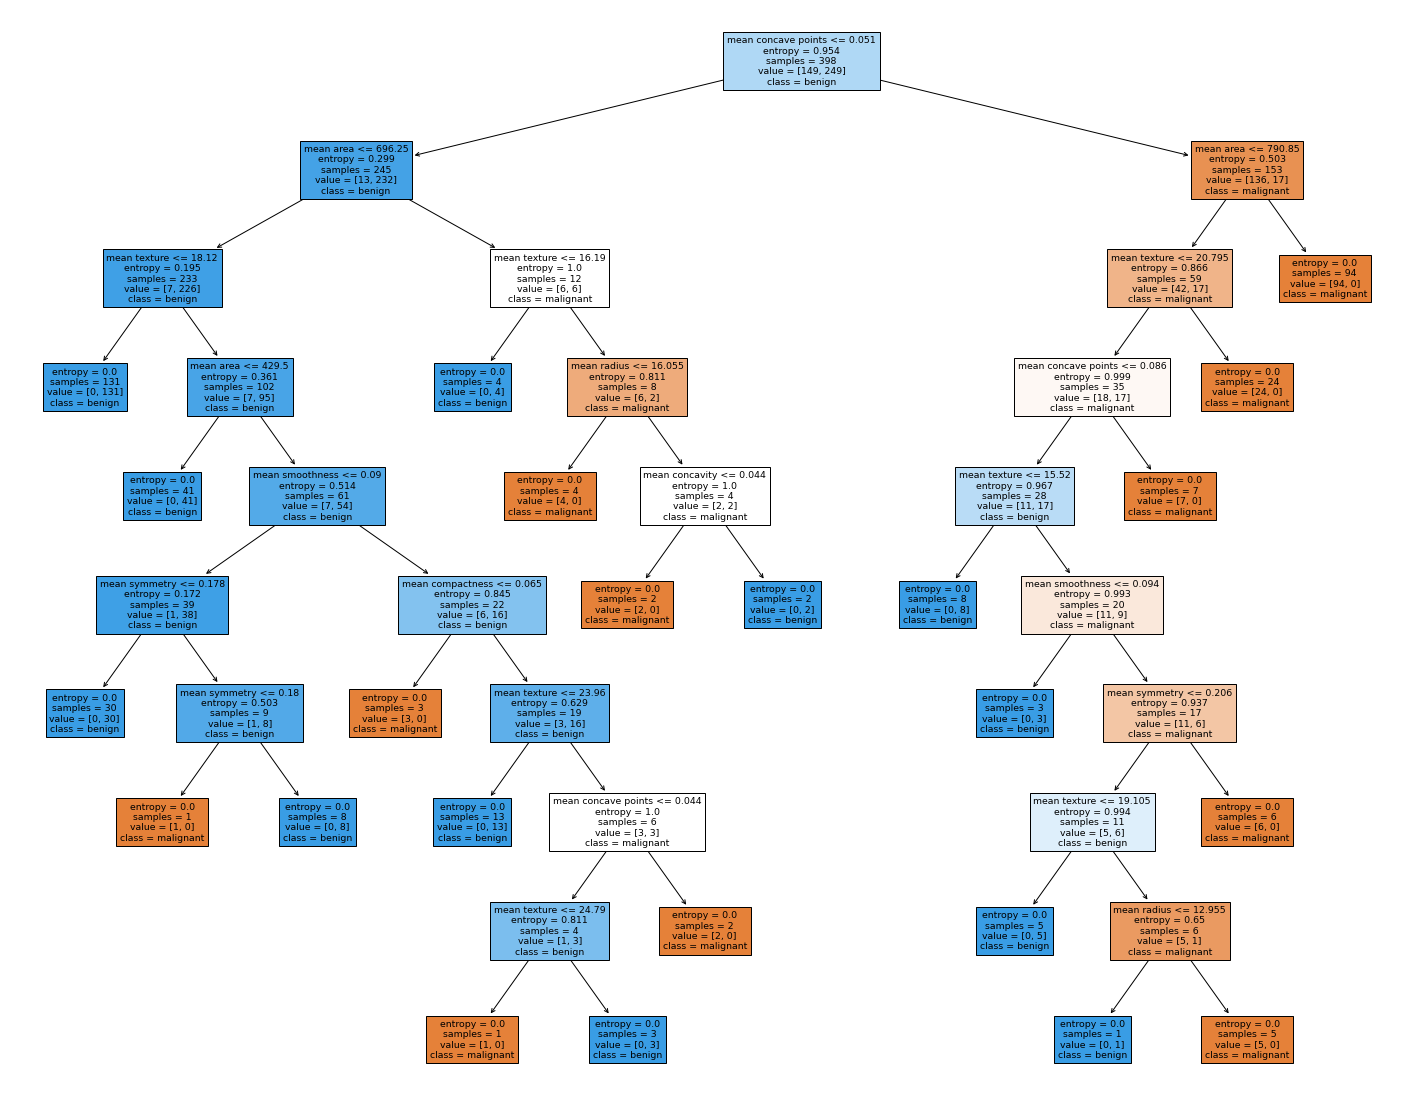

In [11]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_dt, 
                   feature_names=data.feature_names[0:9],  
                   class_names=data.target_names,
                   filled=True)